## 1. mnist softmax 
softmax : 입력에대한 출력값을 0~1로 표현. 출력값의 총합은 1

In [57]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import random

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
tf.set_random_seed(777)

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
# input parameter
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weight & bias for nn layers
# 784개의 vector / 10개의 label 0~9
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

In [15]:
# hyper parameter
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X,W) + b

In [16]:
# cost/loss 정의 
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis, labels=tf.stop_gradient(Y)
    )
)

# optimizer 정의 
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
# 정확도 계산
correct_prediction = tf.equal (tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Epoch : 0001, Cost: 5.001816963
Epoch : 0002, Cost: 1.658058841
Epoch : 0003, Cost: 1.110753879
Epoch : 0004, Cost: 0.886254073
Epoch : 0005, Cost: 0.758260023
Epoch : 0006, Cost: 0.674546873
Epoch : 0007, Cost: 0.613410999
Epoch : 0008, Cost: 0.568356522
Epoch : 0009, Cost: 0.532773287
Epoch : 0010, Cost: 0.503520328
Epoch : 0011, Cost: 0.479934495
Epoch : 0012, Cost: 0.459508651
Epoch : 0013, Cost: 0.442006149
Epoch : 0014, Cost: 0.426964147
Epoch : 0015, Cost: 0.413709551
Epoch : 0016, Cost: 0.401978964
Epoch : 0017, Cost: 0.390872027
Epoch : 0018, Cost: 0.381114322
Epoch : 0019, Cost: 0.372538802
Epoch : 0020, Cost: 0.363989159
Epoch : 0021, Cost: 0.357027678
Epoch : 0022, Cost: 0.350123646
Epoch : 0023, Cost: 0.343839990
Epoch : 0024, Cost: 0.337759883
Epoch : 0025, Cost: 0.333415367
Epoch : 0026, Cost: 0.327580340
Epoch : 0027, Cost: 0.322610376
Epoch : 0028, Cost: 0.318866933
Epoch : 0029, Cost: 0.314787902
Epoch : 0030, Cost: 0.311267480
Epoch : 0031, Cost: 0.307280444
Epoch : 

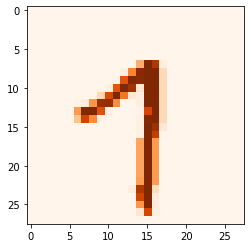

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y:batch_ys})
            avg_cost += cost_val/ num_iterations
            
        print(f"Epoch : {(epoch + 1):04d}, Cost: {avg_cost:.9f}")
        
    print("--- Learning Finished ---")
    
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})        
    )
    
    r = random.randint(0, mnist.test.num_examples -1)
    
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r+1], axis=1)))
    
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r+1]}
        )
    )
    
    plt.imshow(
        mnist.test.images[r: r+1].reshape(28,28),
        cmap="Oranges",
        interpolation="nearest",    
    )
    plt.show()    
    

## 2. mnist nn

In [43]:
# data 초기화 
mnist = input_data.read_data_sets("/MNIST_data", one_hot=True)

Extracting /MNIST_data\train-images-idx3-ubyte.gz
Extracting /MNIST_data\train-labels-idx1-ubyte.gz
Extracting /MNIST_data\t10k-images-idx3-ubyte.gz
Extracting /MNIST_data\t10k-labels-idx1-ubyte.gz


In [44]:
# hypter parameter
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [50]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3) + b3 # layer에만 relu 적용
                        


In [51]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                    logits=hypothesis, labels=Y
                ))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [52]:
# session 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [53]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y:batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        
        avg_cost += c/total_batch
        
    print('Epoch:', '%04d' %(epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))
    
print('Learning Finished')

Epoch: 0001 cost= 163.683018490
Epoch: 0002 cost= 42.887133364
Epoch: 0003 cost= 26.381618609
Epoch: 0004 cost= 18.451148392
Epoch: 0005 cost= 13.261625925
Epoch: 0006 cost= 9.802602739
Epoch: 0007 cost= 7.213090912
Epoch: 0008 cost= 5.282846326
Epoch: 0009 cost= 3.914780312
Epoch: 0010 cost= 2.877868259
Epoch: 0011 cost= 2.213629507
Epoch: 0012 cost= 1.660382162
Epoch: 0013 cost= 1.275305442
Epoch: 0014 cost= 0.987747790
Epoch: 0015 cost= 0.820532801
Learning Finished


- 15번 시도한 결과 cost는 예상대로 작아졌다. 

In [54]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels
}))

Accuracy: 0.9446


In [55]:
# 예를 들어 하나만 예측하여 확인해보자.
r = random.randint(0, mnist.test.num_examples -1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

Label:  [9]
Prediction:  [9]


## 3. mnist nn xavier
xavier : 초기화 함수
사용법은 Weight마다 xavier로 initialize를 하면 된다. 간단하다 .

In [60]:
# https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/initializers
# tf.contrib.layers.xavier_initializer() -> class glorot_normal: The Glorot normal initializer, also called Xavier normal initializer.

W1 = tf.get_variable("W1", shape=[784, 256],
                    initializer=tf.keras.initializers.glorot_normal())


## 4. mnist nn deep

## 5. mnist nn droput

# 심화
## 6. mnist nn batchnorm
## 7. mnist nn higher level API
## 8. mnist nn sleu